In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
np.random.seed(123)
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')
test.head()

,country,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_6056,Urban,Yes,3,30,Male,Head of Household,Married/Living together,Secondary education,Formally employed Government
1,Kenya,2018,uniqueid_6060,Urban,Yes,7,51,Male,Head of Household,Married/Living together,Vocational/Specialised training,Formally employed Private
2,Kenya,2018,uniqueid_6065,Rural,No,3,77,Female,Parent,Married/Living together,No formal education,Remittance Dependent
3,Kenya,2018,uniqueid_6072,Rural,No,6,39,Female,Head of Household,Married/Living together,Primary education,Remittance Dependent
4,Kenya,2018,uniqueid_6073,Urban,No,3,16,Male,Child,Single/Never Married,Secondary education,Remittance Dependent


In [4]:
print(train.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB
None


In [5]:
#Preprocessing model
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

#Convert target label to numerical data

le = LabelEncoder()
train['bank_account'] = le.fit_transform(train['bank_account'])

#Separate training features from target
X_train = train.drop(['bank_account'], axis=1)
y_train = train['bank_account']

y_train

0        1
1        0
2        1
3        0
4        0
        ..
23519    0
23520    0
23521    0
23522    0
23523    0
Name: bank_account, Length: 23524, dtype: int32

In [12]:
def preprocessing_data(data):
    float_array = data[['household_size','age_of_respondent','year']].values.astype(float)

    # Variables to be one hot encoded
    categ = [
        'relationship_with_head',
        'marital_status',
        'education_level',
        'job_type',
        'country'
    ]

    # One hot encoding

    data = pd.get_dummies(data, prefix_sep='_', columns=categ)

    # Label encoding

    data['location_type'] = le.fit_transform(data['location_type'])
    data['cellphone_access'] = le.fit_transform(data['cellphone_access'])
    data['gender_of_respondent'] = le.fit_transform(data['gender_of_respondent'])

    # Drop uniquid colm

    data = data.drop(['uniqueid'],axis=1)

    # Scale our data in range of 0 and 1

    scaler = MinMaxScaler(feature_range=(0,1))

    data = scaler.fit_transform(data)

    return data







In [14]:
# Preprocess the train data

processed_train  = preprocessing_data(X_train)
processed_test  = preprocessing_data(test)


In [16]:
preprocessed_train[:1]

array([[1.        , 1.        , 1.        , 0.10526316, 0.16666667,
        1.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 1.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        1.        , 0.        , 0.        , 0.        , 0.        ,
        1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 1.        , 0.        ,
        0.        , 0.        ]])

In [17]:
processed_train.shape

(23524, 37)

In [18]:
# Split train data set to train and evaluation data sets

from sklearn.model_selection import train_test_split

X_Train, X_Val, y_Train, y_Val = train_test_split(processed_train, y_train, stratify=y_train, test_size=0.1, random_state=42)


In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier

lg_model = LogisticRegression()
rf_model = RandomForestClassifier()
kn_model = KNeighborsClassifier()
et_model = ExtraTreesClassifier()
xg_model = XGBClassifier()

lg_model.fit(X_Train, y_Train)
rf_model.fit(X_Train, y_Train)
kn_model.fit(X_Train, y_Train)
et_model.fit(X_Train, y_Train)
xg_model.fit(X_Train, y_Train)



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [25]:
# Evaluation metrics

from sklearn.metrics import confusion_matrix, accuracy_score

lg_y_pred = lg_model.predict(X_Val)
rf_y_pred = rf_model.predict(X_Val)
kn_y_pred = kn_model.predict(X_Val)
et_y_pred = et_model.predict(X_Val)
xg_y_pred = xg_model.predict(X_Val)

 
# Error rate
print("Error rate Logistic Regression classifier: ", 1 - accuracy_score(y_Val, lg_y_pred))



print("Error rate of Extra Tree classifier: ", 1 - accuracy_score(y_Val, et_y_pred))

print("Error rate of XGB classifier: ", 1 - accuracy_score(y_Val, xg_y_pred))

print("Error rate of KNeighbors classifier: ", 1 - accuracy_score(y_Val, kn_y_pred))

print("Error rate of Random Forest classifier: ", 1 - accuracy_score(y_Val, rf_y_pred))

Error rate Logistic Regression classifier:  0.11219719507012327
Error rate of Extra Tree classifier:  0.14747131321716955
Error rate of XGB classifier:  0.11177220569485757
Error rate of KNeighbors classifier:  0.11942201444963874
Error rate of Random Forest classifier:  0.1368465788355291


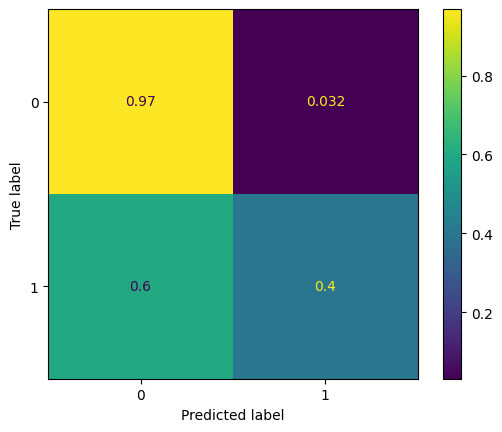

In [33]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(xg_model, X_Val, y_Val,normalize='true')

The model has a high true negative rate, meaning it is very good at identifying the negative class. This might be because the dataset was imbalanced by having more of class 0

In [73]:
from sklearn.model_selection import GridSearchCV

param_grid = {'min_child_weight': [0.5, 1, 5, 10],
        'gamma': [0.3,0.4,0.5, 1],
        'subsample': [0.75, 0.8,0.85],
        'max_depth': [3,4, 5]
        }

my_xgb_model = GridSearchCV(xg_model, param_grid,n_jobs=-1,verbose=2,cv=5)
my_xgb_model.fit(X_Train, y_Train)
print(my_xgb_model.best_params_) 


Fitting 5 folds for each of 144 candidates, totalling 720 fits
{'gamma': 0.3, 'max_depth': 3, 'min_child_weight': 1, 'subsample': 0.75}


In [75]:
xgb_model = XGBClassifier(min_child_weight=0.5,gamma=0.5,subsample=0.75,max_depth=3)
xgb_model.fit(X_Train, y_Train)
y_pred = xgb_model.predict(X_Val)

print("Error rate of the XGB classifier: ", 1 - accuracy_score(y_Val, y_pred))

Error rate of the XGB classifier:  0.10752231194220141


In [76]:
test.bank_account = xgb_model.predict(processed_test)

NameError: name 'processed_test' is not defined